In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

# Importing all the dataframes

In [14]:
## Function to reduce the memmory that ocupies a Dataframe

def import_data_optimized(file):
    """Optimiza el uso de memoria de un DataFrame convirtiendo las columnas al tipo de dato más pequeño posible."""
    df = pd.read_csv(file)
    start_mem = df.memory_usage().sum() / 1024**2
    print(file)
    print(f'Uso inicial de memoria: {start_mem:.2f} MB')
    
    # Diccionario de tipos de datos y sus límites
    int_types = {
        np.int8: (-128, 127),
        np.int16: (-32768, 32767),
        np.int32: (-2**31, 2**31 - 1),
        np.int64: (-2**63, 2**63 - 1)
    }
    
    float_types = {
        np.float16: (np.finfo(np.float16).min, np.finfo(np.float16).max),
        np.float32: (np.finfo(np.float32).min, np.finfo(np.float32).max)
    }
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min, c_max = df[col].min(), df[col].max()
            
            if str(col_type)[:3] == 'int':
                for dtype, (min_val, max_val) in int_types.items():
                    if c_min > min_val and c_max < max_val:
                        df[col] = df[col].astype(dtype)
                        break
            else:
                for dtype, (min_val, max_val) in float_types.items():
                    if c_min > min_val and c_max < max_val:
                        df[col] = df[col].astype(dtype)
                        break
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage().sum() / 1024**2
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Uso final de memoria: {end_mem:.2f} MB')
    print(f'Reducción: {reduction:.1f}%')
    
    return df

In [15]:
games_df1 = pd.read_csv('../input/csgo-matchmaking-damage/esea_meta_demos.part1.csv')
games_df2 = pd.read_csv('../input/csgo-matchmaking-damage/esea_meta_demos.part2.csv')
kills_df_part1 = import_data_optimized('../input/csgo-matchmaking-damage/esea_master_kills_demos.part1.csv')
kills_df_part2 = import_data_optimized('../input/csgo-matchmaking-damage/esea_master_kills_demos.part2.csv')
damage_df_part1 =  import_data_optimized('../input/csgo-matchmaking-damage/esea_master_dmg_demos.part1.csv')
damage_df_part2 =  import_data_optimized('../input/csgo-matchmaking-damage/esea_master_dmg_demos.part2.csv')

../input/csgo-matchmaking-damage/esea_master_kills_demos.part1.csv
Uso inicial de memoria: 145.19 MB
Uso final de memoria: 28.76 MB
Reducción: 80.2%
../input/csgo-matchmaking-damage/esea_master_kills_demos.part2.csv
Uso inicial de memoria: 108.53 MB
Uso final de memoria: 21.56 MB
Reducción: 80.1%
../input/csgo-matchmaking-damage/esea_master_dmg_demos.part1.csv
Uso inicial de memoria: 1011.47 MB
Uso final de memoria: 268.90 MB
Reducción: 73.4%
../input/csgo-matchmaking-damage/esea_master_dmg_demos.part2.csv
Uso inicial de memoria: 767.38 MB
Uso final de memoria: 204.07 MB
Reducción: 73.4%


In [16]:
print("games_df")
games_df = pd.concat([games_df1, games_df2])
games_df = games_df[['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_side']]
games_df.info()

print("kills_df")
kills_df = pd.concat([kills_df_part1, kills_df_part2])
kills_df = kills_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'wp_type']]
kills_df.info()

print("damage_df")
damage_df = pd.concat([damage_df_part1, damage_df_part2])
damage_df.info()
damage_df = damage_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'hp_dmg',
                       'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']]

del damage_df_part1
del damage_df_part2
del kills_df_part1
del kills_df_part2
gc.collect()

damage_df.info()

games_df
<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_side    377628 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 20.2+ MB
kills_df
<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   file      object  
 1   round     int8    
 2   tick      int32   
 3   seconds   float16 
 4   att_side  category
 5   vic_side  category
 6   wp        object  
 7   wp_type   category
dtypes: category(3), float16(1), int32(1), int8(1), object(2)
memory usage: 88.9+ MB
damage_df
<class 'pand

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='round', ylabel='count'>

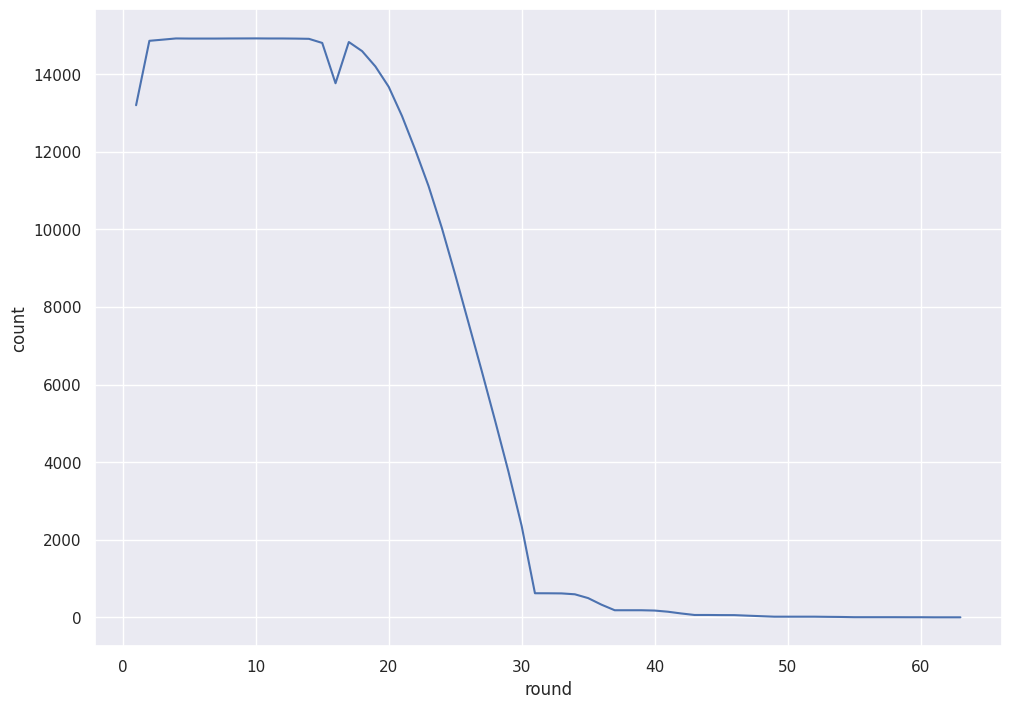

In [17]:
round_count = games_df['round'].value_counts()

sns.lineplot(round_count)

<Axes: xlabel='map', ylabel='count'>

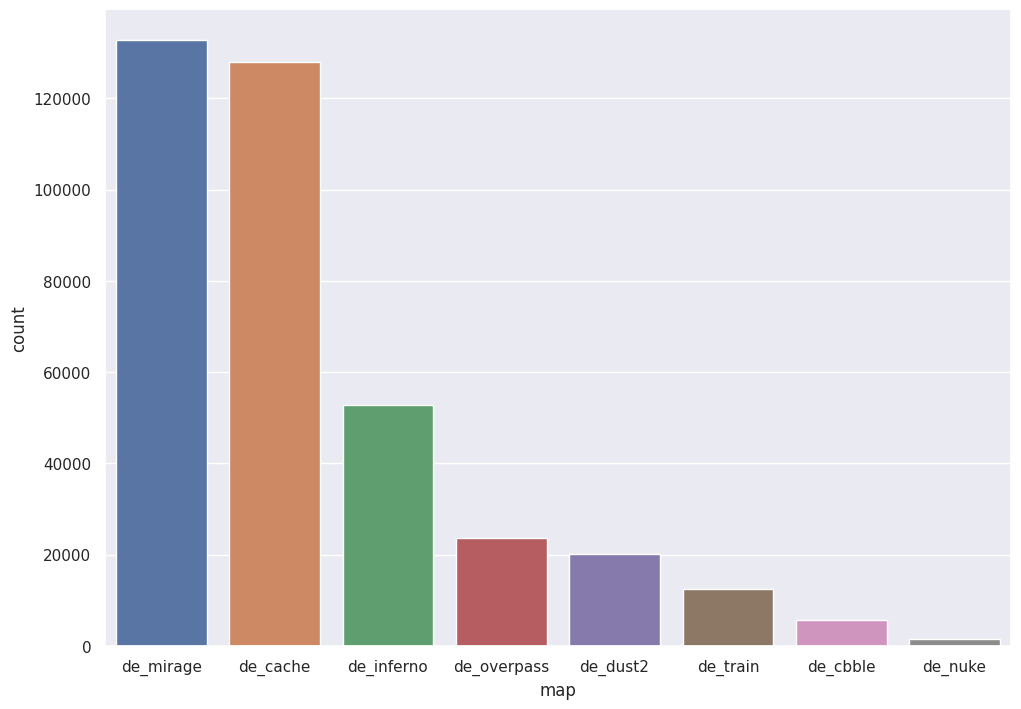

In [18]:
map_counts = games_df['map'].value_counts()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=map_counts.index, y=map_counts)

/tmp/ipykernel_24/180777949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_duration['duration'] = round_duration['end_seconds'] - round_duration['start_seconds']
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


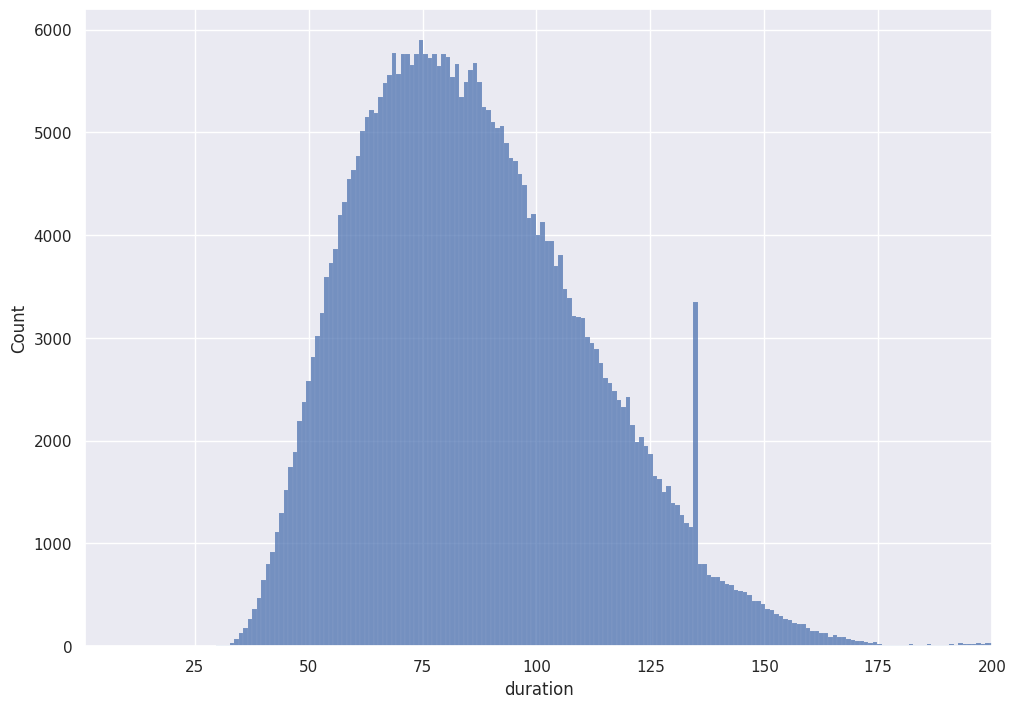

In [19]:

pd.option_context('mode.use_inf_as_na', True)

round_duration = games_df[['start_seconds', 'end_seconds']]
round_duration['duration'] = round_duration['end_seconds'] - round_duration['start_seconds']

fig, ax = plt.subplots()
sns.histplot(round_duration['duration'], ax=ax)
ax.set_xlim(1, 200)
plt.show()